# Polynomial Regression

## 1. Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

## 2. Load Data

In [4]:
path=r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(path)

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Reorganize Columns

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Data Set

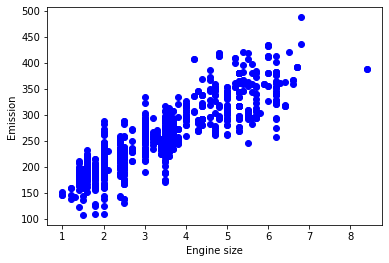

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## 3. Split Data Into Training & Test
80% Training, 20% Test

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Training Set

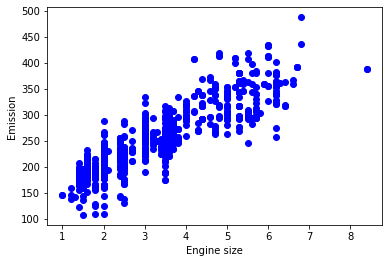

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Test Set

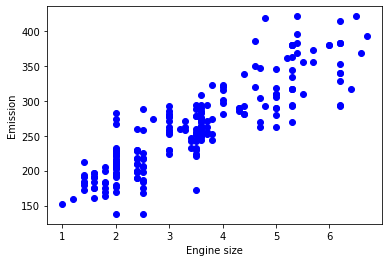

In [9]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## 4. Algorithm

Polynomial Regression

$$
y = \theta_{0}  x_{0} + \theta_{1}  x_{1} + \theta_{2} x_{2}
$$

In [10]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

## 5. Optimization
Ordinary Least Square (OLS) (Normal Equation)

$$
Ɵ=(X^T X)^{-1} X^T y
$$

Minimizes the Residual Sum of Squares (RSS).

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

In [11]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.        51.0701149 -1.6119878]]
Intercept:  [106.43944143]


## 6. Prediction

In [12]:
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

Text(0, 0.5, 'Emission')

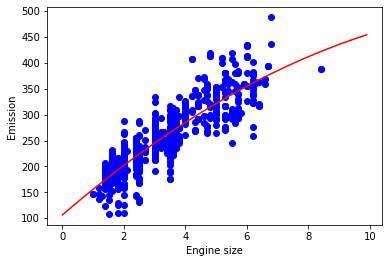

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## 7. Evaluation/Accuracy

Mean Absolute Error (MAE)

0 - ꚙ	Negatively Orientated

$$
MAE = \frac{1}{n} \sum \limits _{i=1} ^{n} |y_i-(\hat{y_i})|
$$

In [14]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))

Mean Absolute Error (MAE): 23.51


Residual Sum of Squares (RSS)

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

In [15]:
print("Residual Sum of Squares (RSS): %.2f" % np.mean((test_y_ - test_y) ** 2))

Residual Sum of Squares (RSS): 926.70


Coefficient of Determination (R^2 Score)

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

R^2 : Coefficient of Determination

RSS : Residual Sum of Squares

TSS : Total Sum of Squares

In [16]:
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

R2-score: 0.77
